In [3]:
%pip install pandas numpy scikit-learn matplotlib seaborn nltk joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HONOR\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HONOR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HONOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Загрузка данных
data = pd.read_csv('coment.csv')

# Подготовка признаков
text_features = ['comment']
numeric_features = ['Вопрос решен', 'Нравится качество выполнения заявки', 
                    'Нравится качество работы сотрудников', 'Нравится скорость отработки заявок',
                    'Понравилось выполнение заявки', 'Проблемы']

X = data[text_features + numeric_features]
y = data['rating'] - 1  # Преобразуем метки в [0,1,2,3,4]

# Преобразование текстовых признаков
text_transformer = TfidfVectorizer(max_features=1000, stop_words='russian')  # Указали русские стоп-слова
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'comment'),
        ('num', numeric_transformer, numeric_features)
    ])

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax',
        num_class=5,
        random_state=42
    ))
])

model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4', '5']))  # Выводим исходные метки

FileNotFoundError: [Errno 2] No such file or directory: 'coment.csv'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HONOR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HONOR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Файл с данными не найден. Пожалуйста, укажите правильный путь.
Первые 5 строк данных:
                         comment_text  Нравится скорость отработки заявок  \
0          быстро решили мою проблему                                   1   
1        качественно выполнили работу                                   0   
2  сотрудники вежливые и компетентные                                   0   
3    все сделали в срок и качественно                                   1   
4              спасибо, вопрос закрыт                                   0   

   Нравится качество выполнения заявки  Нравится качество работы сотрудников  \
0                                    0                                     0   
1                                    1                                     0   
2                                    0                                     1   
3                                    1                                     0   
4                                    0             

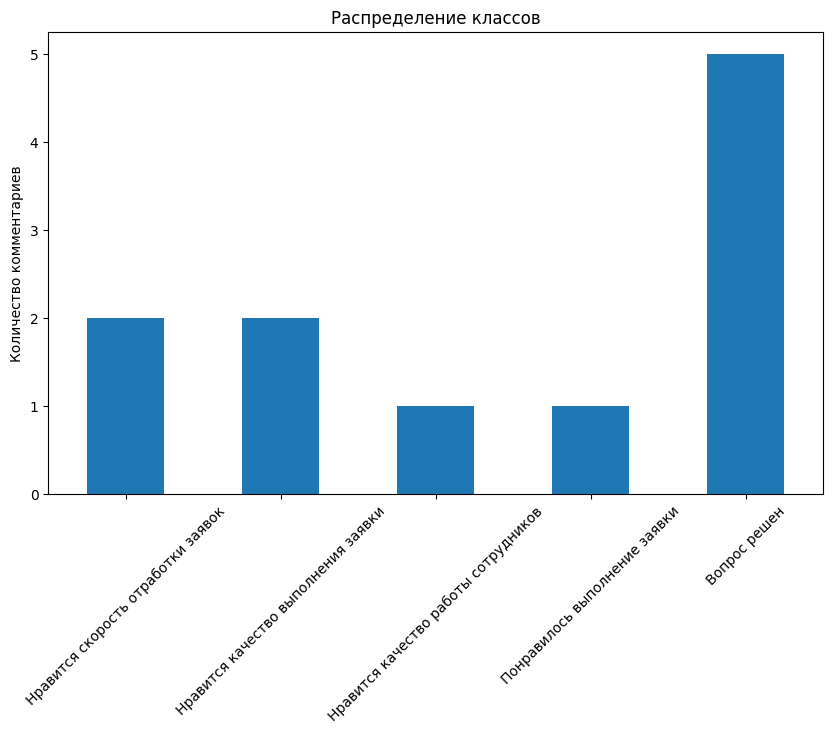

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\HONOR/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\HONOR\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Загрузка данных (предполагаем, что данные в CSV формате)
# В реальном случае нужно заменить на актуальный путь к файлу
try:
    df = pd.read_csv('comments_dataset.csv')
except FileNotFoundError:
    print("Файл с данными не найден. Пожалуйста, укажите правильный путь.")
    # Создаем демо-датафрейм для примера
    data = {
        'comment_text': [
            'быстро решили мою проблему', 
            'качественно выполнили работу', 
            'сотрудники вежливые и компетентные',
            'все сделали в срок и качественно',
            'спасибо, вопрос закрыт'
        ],
        'Нравится скорость отработки заявок': [1, 0, 0, 1, 0],
        'Нравится качество выполнения заявки': [0, 1, 0, 1, 0],
        'Нравится качество работы сотрудников': [0, 0, 1, 0, 0],
        'Понравилось выполнение заявки': [0, 0, 0, 1, 0],
        'Вопрос решен': [1, 1, 1, 1, 1]
    }
    df = pd.DataFrame(data)

# Предварительный анализ данных
print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистика по данным:")
print(df.describe())
print("\nПроверка на дубликаты:")
print(f"Найдено {df.duplicated().sum()} дубликатов")

# Удаление дубликатов
df = df.drop_duplicates()

# Анализ распределения классов
plt.figure(figsize=(10, 6))
df.drop('comment_text', axis=1).sum().plot(kind='bar')
plt.title('Распределение классов')
plt.ylabel('Количество комментариев')
plt.xticks(rotation=45)
plt.show()

# Функции для предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление пунктуации
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Удаление цифр
    text = re.sub(r'\d+', '', text)
    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_and_stem(text):
    # Токенизация
    tokens = word_tokenize(text)
    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words]
    # Стемминг
    stemmer = SnowballStemmer('russian')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Применение предобработки
df['processed_text'] = df['comment_text'].apply(preprocess_text).apply(tokenize_and_stem)

# Разделение данных на признаки и целевую переменную
X = df['processed_text']
y = df.drop(['comment_text', 'processed_text'], axis=1)

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текста
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Создание и обучение модели
# Попробуем несколько алгоритмов

# 1. Логистическая регрессия
lr = MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42))
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict_proba(X_test_tfidf)

# Для многометочной классификации ROC-AUC нужно вычислить для каждого класса отдельно
lr_roc_auc = []
for i in range(y_test.shape[1]):
    lr_roc_auc.append(roc_auc_score(y_test.iloc[:, i], [p[1] for p in lr_pred[i]]))

print("\nLogistic Regression ROC-AUC:")
for i, score in enumerate(lr_roc_auc):
    print(f"{y_test.columns[i]}: {score:.4f}")
print(f"Average ROC-AUC: {np.mean(lr_roc_auc):.4f}")

# 2. Случайный лес
rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict_proba(X_test_tfidf)

rf_roc_auc = []
for i in range(y_test.shape[1]):
    rf_roc_auc.append(roc_auc_score(y_test.iloc[:, i], [p[1] for p in rf_pred[i]]))

print("\nRandom Forest ROC-AUC:")
for i, score in enumerate(rf_roc_auc):
    print(f"{y_test.columns[i]}: {score:.4f}")
print(f"Average ROC-AUC: {np.mean(rf_roc_auc):.4f}")

# Подбор гиперпараметров для лучшей модели (логистическая регрессия)
param_dist = {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'estimator__solver': ['saga']
}

random_search = RandomizedSearchCV(
    MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42)),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    random_state=42
)

random_search.fit(X_train_tfidf, y_train)

print("\nЛучшие параметры:")
print(random_search.best_params_)

# Оценка лучшей модели на тестовых данных
best_model = random_search.best_estimator_
best_pred = best_model.predict_proba(X_test_tfidf)

best_roc_auc = []
for i in range(y_test.shape[1]):
    best_roc_auc.append(roc_auc_score(y_test.iloc[:, i], [p[1] for p in best_pred[i]]))

print("\nBest Model ROC-AUC:")
for i, score in enumerate(best_roc_auc):
    print(f"{y_test.columns[i]}: {score:.4f}")
print(f"Average ROC-AUC: {np.mean(best_roc_auc):.4f}")

# Анализ важности признаков для одного из классов (например, первого)
feature_names = tfidf.get_feature_names_out()
coefs = best_model.estimators_[0].coef_[0]
top_features = pd.DataFrame({'feature': feature_names, 'coef': coefs})
top_features = top_features.sort_values('coef', ascending=False)

print("\nТоп-10 важных признаков для первого класса:")
print(top_features.head(10))
print("\nТоп-10 наименее важных признаков для первого класса:")
print(top_features.tail(10))

# Сохранение модели для последующего использования
import joblib
joblib.dump(best_model, 'comment_classifier_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("\nМодель и векторизатор сохранены в файлы 'comment_classifier_model.pkl' и 'tfidf_vectorizer.pkl'")

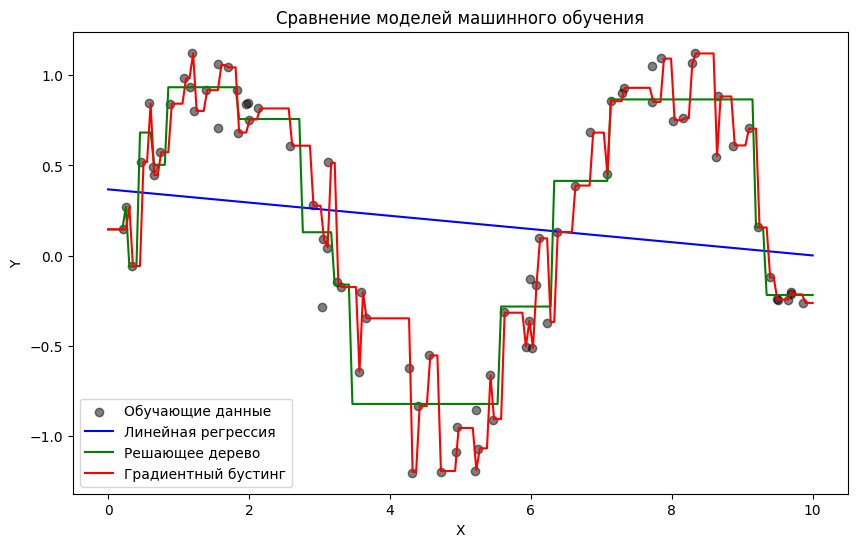

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Создаем синтетические данные
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.2

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модели
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(max_depth=4)
model_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# Предсказываем
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
pred_lr = model_lr.predict(X_plot)
pred_dt = model_dt.predict(X_plot)
pred_xgb = model_xgb.predict(X_plot)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='black', label='Обучающие данные', alpha=0.5)
plt.plot(X_plot, pred_lr, label='Линейная регрессия', color='blue')
plt.plot(X_plot, pred_dt, label='Решающее дерево', color='green')
plt.plot(X_plot, pred_xgb, label='Градиентный бустинг', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сравнение моделей машинного обучения')
plt.legend()
plt.show()